# What is the Feature Engineering?

Trong bài toán machine learning chung thì để có thể áp dụng được các bài toán với nhiệm vụ phân loại ( phân loại chó mèo), hay hồi quy ( dự đoán giá nhà). Thì chúng ta cần mô tả những dữ liệu thực tế thành dữ liệu máy tính có thể hiểu được đó là các dạng dữ liệu int, float vvvv.

![](https://cdn-images-1.medium.com/max/800/1*ZX05x1xYgaVoa4Vn2kKS9g.png)

Trong bài này chúng ta sẽ giới hạn lại trong bài toán áp dụng machine learning. Còn deep learning là một nhánh của machine learning chúng ta sẽ khám phá sau.

Về cơ bản mỗi sự vật hiện tượng bên ngoài đời sống thực mà muốn cho máy tính hiểu được cần phải có sự biểu diễn dạng dữ liệu khác như con số, chữ viết,vvv.. Chẳng hạn như con chó có hình dạng khác con mèo theo qua sát bằng mắt người nhưng máy tính không thể nhìn như vậy được, mà nó nhìn thông qua thuộc tính mà con người ta định nghĩa cho con chó và mèo. C

Qúa trình mà chúng ta rút trích các đặc điểm và mã hóa nó thành các vector để cho máy tính hiểu được là bước feature extraction (khai thác tính năng.). 

Qúa trình đó có thể gồm nhiều công việc chẳng hạn muốn xây dựng một mô hình học máy phân biệt nam và nữ. Thì bước đầu là trích đặc trưng

Ta tháy nam có ít tóc hơn nữ, nên ta đếm xem số pixel có màu đen ảnh nào nhiều hơn => đó là nữ, và ngược lại. Trên thực tế để có thể nhận diện, phân loại chính xác chúng ta sử dụng đến nhiều các đặc trưng kết hợp với nhau thì mới xác định như nó có thể tập các thuộc tính như: 

+ Cao trên 1m7 (yes/no)
+ Năm trên 60kg (yes/no)
+ Tóc ngắn (yes/no)

Từ tập thuộc tính ta phải mô tả nó dạng số học logic bằng kiểu dữ liệu mà máy hiểu được chẳng hạn một người cao 1m6 nặng 70 kg và tóc dài ta được vector đặc trưng:

x = [0 1 1] 

Qúa trình này gọi là rút trích đặc trưng.

Vậy thì rút đặc trưng thì có cách nào chung hay không, có quy chuẩn nào không..

Về cơ bản nó không có quy chuẩn nào cả, đôi sự phát hiện của bạn đem đến giá trị cho cả một mô hình. Với loại dữ liệu khác nhau thì có nhưng các rút đặc trưng khác nhau, và không loại nào giống nào nào. Không thể áp dụng lấy đặc trưng ảnh cho text hay âm thanh và ngược lại.

Chúng ta sẽ đi khám phá về trích đặc trưng của các loại dữ liệu gồm ảnh, text, âm thanh. Trước hết do những vấn đề thời gian cũng như điều kiện phạm vi kiến thức, tối chỉ mới có thể viết về đặc trưng ảnh, tôi sẽ update chúng sau trong khi tôi hoàn thiện kiến thức bản thân.



### Phần 1: Các đặc trưng hình ảnh, và rút trích đặc trưng hình ảnh.

Thứ nhất trước khi đi vào giải thích các đặc trưng ảnh thì chúng ta khám phá, ảnh được mô tả như thế nào, được cấu thành ra sao trong máy tính.

Phạm vi tôi nói ở đây là ảnh số là ảnh trong thường ngày chúng ta bắt gặp trên instagram, facebook, youtube... Về cơ bản nó được cấu thành từ các pixel.

Đến đấy chúng ta sẽ biết được ảnh có nhiều pixel trên một diện tích thì ảnh sắc nét hơn, so với ảnh có ít pixel hơn. Do khi ảnh ít pixel hơn thì để đảm bảo đủ diện tích thì các pixel ấy có kích thước lớn, khiến chung ta thấy được cả những hình vuông pixel, còn khi pixel nhỏ thì cảm giác mềm mịn hơn.

![](https://bietmaytinh.com/wp-content/uploads/2018/01/pixel-art-ve-tranh-diem-anh.png)

Hình minh họa

Chính bởi cấu thành từ các pixel nên mà các bài toán, các thuật toán trích đặc trưng ảnh dựa vào pixel để giúp tìm ra những đặc trưng trên ảnh.

Và mỗi pixel ấy có một giá trị, tùy vào kênh màu, miền biển diễn giá trị đó có thể khác nhau. Như ảnh mức xám thì từng pixel có giá trị từ 0-255 biểu thị mức xám biểu diễn của pixel đó. 


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('images/test.jpg')
print(img.shape)

(3456, 5184, 3)


Quan sát thực tế chúng ta tháy rằng con người ta phân biệt được các ảnh với nhau, hay biết nội dung trong ảnh với nhau thì do các yếu tố: Tôi sẽ phân tích theo giai đoạn phát triển của bạn.

+ Khi bạn còn nhỏ:

Bạn nhìn thế giới đơn giản lắm bố mẹ bạn chỉ cho bạn con thỏ trắng, quả cam màu vàng. Hay quả trứng tròn, dài quả mướp ....

Đó là sự tiếp thu của bạn về thời giới này thông qua màu sắc kết hợp hình ảnh để phân biệt nó. Đó là 2 đặc trưng cơ bản của hình ảnh mà chúng ta nhìn được.

+ Khi bạn lớn hơn:

Bạn biết được nhiều thứ hơn bạn được bố mẹ cho đi nhiều nơi hơn bạn biết nhiều hơn các kiến thức và bạn biết rằng có nhiều quả có màu sắc giống nhau, có hình dạng giống nhau nhưng lại không phải là 1 quả do mùi vị, do kích thước. Chẳng hạn quả chanh và quả cam đều có hình tròn và vỏ có màu xanh nhưng lại 2 quả khác nhau do vị hai quả khác nhau, kích thước khác nhau.

Như vậy bạn nhìn nhận một thứ bằng nhiều yếu tố hơn rồi.

+ Khi bạn có nhận thức nhiều hơn:

Bạn phân biệt được người với nhau thông quá những đặc điểm góc cạnh trên khuôn mặt, thâm chí 2 ae sinh đôi bạn nhận ra được, có thể 1 ngày 2 ngày vẫn nhầm nhưng học với nhau cả 5 năm cấp 1 thì có lẻ bạn đã phân biệt một cách chính xác đâu ra a đâu là e. Đó là sự nhìn nhận sự chi tiết nhỏ.

Trong xử lí ảnh cũng vậy chúng ta có thể làm cho máy tính hiểu được và nhận biết được con người, thì phải cho nó học từ những thuộc tính như vậy, một ít một ít một và kết hợp các loại thuộc tính với nhau. Từ đó nhìn nhận ra đặc trưng hình ảnh bao gồm:

* MÀU SẮC.
* HÌNH DẠNG TỔNG THỂ.
* KÍCH THƯỚC.
* CHI TIẾT CÁC CẠNH, GÓC. ( KẾT CẤU)
* MÙI VỊ KHÓ CÓ THỂ BIỂU DIỄN ĐƯỢC CHO MÁY TÍNH.

Đến đây tôi rút ra một câu tôi khá tâm đắc:

"Máy tính là một đứa trẻ không hơn không kém và chúng ta muốn nó giỏi thì chúng ta phải cho nó học, và nó cần người thầy là chúng ta". (NgocTuHan)

"Máy tính là thiên tài tính toán nhưng chúng lại không biết làm gì cả nếu không có ai đó hướng dẫn".

"Một đứa trẻ như chiếc máy tính nó không phân biệt được đúng sai nếu không ai dạy nó".
(ngoctuhan)



#### Các kĩ thuật rút trích đặc trưng liên quan màu sắc

Tôi yêu các sắc màu, chung là một thứ tuyệt diệu. Đôi khi thêm chút xanh thêm chút đỏ là ra màu mới nó kì diệu chỉ với 3 màu RGB chúng ta có hàng triệu màu sắc khác nhau. Cụ thể là 255 * 255 * 255 = 16 tr màu ui thật vi diệu phải không.

Về cơ bản màu sắc là sự pha trộn của các màu sắc cơ bản:

Chẳng hạn như kênh màu RGB gồm 3 màu chính: red, green, blue sự điểu phối giao hòa 3 màu này đã tạo nên nhiều nhiều màu khác.



In [1]:
import cv2
img = cv2.imread('images/test.jpg')
img[0, 0, :]

array([60, 58, 64], dtype=uint8)

1. Miền giá trị màu

Từ quan sát thực tế chúng ta sẽ có tri thức màu sắc thực tế mà được biểu diễn trong máy tính.

<!-- ![](http://www.friendlyarcticprinting.com/wp-content/uploads/2020/02/1-Color-Chart-2019-Andy_reorganization.jpg) -->

![](https://www.researchgate.net/profile/Penerbit_Akademia_Baru/publication/330838912/figure/tbl1/AS:722108392943617@1549175465675/The-range-of-Hue-H-value-with-correspond-color.png)


Từ đó với một vùng ảnh tức tập các pixel có màu sắc nằm trong một ngưỡng nào đó thì chúng ta quy nó là thành đối tượng.

Chính lẻ đó chúng ta có thể biết được bức ảnh chúng ta có những đối tượng nào...

2. Biểu đồ histogram 

Biểu đồ này là một dạng biểu đồ tần suất giúp chúng ta xác định xem là có bao nhiêu điểm ảnh ứng với một giá trị mức sáng.( cùng một mức sáng cho màu đổ nếu mức sáng càng cao thì màu đỏ càng nhạt hơn)

![](images/histogram.png)

![](https://www.tadpolewebworks.com/web/atomic/images/H02-HSV.jpg)


In [11]:
import numpy as np
def cal_histogram(input): # input ma trix have shape = w * h
    
    unique, counts = np.unique(input, return_counts=True)
    return unique, counts
    
a = np.array([0, 3, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 3, 4])

print(cal_histogram(a))

img = cv2.imread('images/test.jpg', 0)
img = cv2.resize(img, (128,128))
print(img)
cal_histogram(img)

(array([0, 1, 2, 3, 4]), array([7, 4, 1, 2, 1], dtype=int64))
[[ 58  57  57 ...  87  44  58]
 [ 63  55  54 ...  80  42  86]
 [ 64  54  52 ...  65  40  80]
 ...
 [ 50 255 242 ...  60  52  51]
 [ 54  53 255 ...  54  52  53]
 [ 55  55 255 ...  54  51  53]]


(array([ 38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
        181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
        194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
        207, 208, 209, 210, 226, 242, 254, 255], dt

3. Mở rộng nghiên cứu (giải pháp của tôi)

Trong hai thuật toán trên chúng ta mới biết được ảnh đó có những nhóm màu nào, phân bố màu đó như thế nào, chưa có cách nào biểu diễn vị trí của màu đó theo vị trí ảnh. 

Chẳng hạn một ảnh chụp trời mây thì vùng trời năm phía trên của ảnh và núi thì phần phía trên là trời có màu xanh, dưới trời có thể núi màu xanh khác tối hơn ...

Vậy chúng ta cần một phương pháp để xác định các khu vực màu và và vị trí tương quan của nó trong ảnh. 

Giải pháp của tôi là:

Chia hình ảnh thành một lưới các ô các kích thước 4 x 3

![](images/grid.png)

Một tập các luật được được sinh ra bằng việc định nghĩa sẵn:

IF RANGE_COLOR () THEN RIVER
IF RANGE_COLOR () THEN SKY
IF RANGE_COLOR () THEN HILL

Một vector đặc trưng có dạng 12 * n_object 

[trời, biển, núi, sống, mấy, rừng, ao, sông]

Giá trị trong vetor biểu diễn là 0 hoặc 1.

Chẳng hạn ô đầu tiên: có range thuộc màu trời, biển.

Thì tương tứng ta có vector mã hóa ô đầu tiên:

g1 = [ 1, 1, 0, 0, 0, 0, 0, 0 ]

Tương tự 1 hình ảnh có 12 giá trị mã hóa cho 12 ô. 

Như vậy 1 hình ảnh chuyển hóa thành vector 12 * n_object.

Một độ độ được áp dụng để so sánh hai hình ảnh. 

Độ đo đó được xác định bằng cách:

<Chưa nghĩ ra khi nào ra tôi sẽ hoàn thiện nó.> Các bạn có đề xuất có thể giúp tôi hoàn thiện nó.



4. Độ đo tương tự màu sắc

Như thuật toán 1 và thuật toán 2 thì cần có một thước đo so sánh các vector được rút trích xa. Chúng ta áp dụng Khoảng cách Ơclit:

Đọc nó tại: https://vi.wikipedia.org/wiki/Kho%E1%BA%A3ng_c%C3%A1ch_Euclid

#### Các cách trích đặc trưng hình dạng cho hình ảnh 

Khác với màu sắc là cái nhìn toàn cục trên bức ảnh, còn hình dạng thì không, hình dạng không là thuộc tính của hình ảnh mà là đặc tính để xác định một khu vực hoặc một đối tượng trong bức ảnh. 

Có 2 cách biểu diễn hình ảnh của bức ảnh:

* Biểu diễn hình dạng bằng các đường biên bao quanh đối tượng (ảnh biên)
* Biển diễn hình dạng bằng một vùng toàn vẹn.

Trong giới hạn này tôi sẽ trình bày 2 thuật toán mà tôi cảm thấy ổn: Canny Edge Detection và Gradients, HOG

Sự thay đổi đột ngột mức xám cho ta biết đó là biên.

1. Canny Edge Detection

Các bước thực hiện:

* Lọc nhiễu:

Do phát hiện cạnh dễ bị nhiễu trong ảnh, bước đầu tiên là loại bỏ nhiễu trong ảnh bằng bộ lọc Gaussian 5x5. 

* Tìm cường độ Gradient của hình ảnh

Hình ảnh được làm mịn sau đó được lọc bằng hạt nhân Sobel theo cả hai chiều ngang và dọc để có được đạo hàm đầu tiên theo hướng ngang $(G_x)$ và hướng dọc $(G_y)$. Từ hai hình ảnh này, chúng ta có thể tìm thấy độ dốc và hướng của từng pixel như sau:

![](images/gradient.jpg)

![](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/fc9752466c9c38d07985d62e86946489e23c61e2.png)


Hướng dốc luôn vuông góc với các cạnh.

* Ức chế không tối đa

Ở bước này, ta dùng một filter 3x3 lần lượt chạy qua các pixel trên ảnh gradient. Trong quá trình lọc, ta xem xét xem độ lớn gradient của pixel trung tâm có phải là cực đại (lớn nhất trong cục bộ - local maximum) so với các gradient ở các pixel xung quanh. Nếu là cực đại, ta sẽ ghi nhận sẽ giữ pixel đó lại. Còn nếu pixel tại đó không phải là cực đại lân cận, ta sẽ set độ lớn gradient của nó về zero. Ta chỉ so sánh pixel trung tâm với 2 pixel lân cận theo hướng gradient. Ví dụ: nếu hướng gradient đang là 0 độ, ta sẽ so pixel trung tâm với pixel liền trái và liền phải nó. Trường hợp khác nếu hướng gradient là 45 độ, ta sẽ so sánh với 2 pixel hàng xóm là góc trên bên phải và góc dưới bên trái của pixel trung tâm. Tương tự cho 2 trường hợp hướng gradient còn lại. Kết thúc bước này ta được một mặt nạ nhị phân.

![](https://firebasestorage.googleapis.com/v0/b/minh-nguyen-blog.appspot.com/o/post-images%2Fopencv%2Fnms.jpg?alt=media&token=48e544e7-a7a1-49f6-8f5b-580aea1c8f44)

* Lọc ngưỡng: ta sẽ xét các pixel dương trên mặt nạ nhị phân kết quả của bước trước. Nếu giá trị gradient vượt ngưỡng max_val thì pixel đó chắc chắn là cạnh. Các pixel có độ lớn gradient nhỏ hơn ngưỡng min_val sẽ bị loại bỏ. Còn các pixel nằm trong khoảng 2 ngưỡng trên sẽ được xem xét rằng nó có nằm liên kề với những pixel được cho là "chắc chắn là cạnh" hay không. Nếu liền kề thì ta giữ, còn không liền kề bất cứ pixel cạnh nào thì ta loại. Sau bước này ta có thể áp dụng thêm bước hậu xử lý loại bỏ nhiễu (tức những pixel cạnh rời rạc hay cạnh ngắn) nếu muốn.


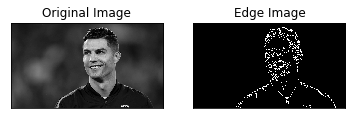

In [15]:
# Demo:

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/test2.jpg',0)
edges = cv2.Canny(img,50,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


2. Histogram of Oriented Gradients (HOG)

Đôi nét giới thiệu HOG là đặc trưng mạnh mẽ về hình dạng nó từng cùng với SVM + NMS tạo nên bộ ba đã có đóng góp lớn trong bài toán phân loại và phát hiện đối tượng trong machine learning trong thời gian dài. 

Đến ngày nay với sự phát triển mạnh mẽ của Deeplearning ắt hẳn nhiều cái tên khác đã làm cho nó lu mờ theo thời gian. Nhưng với tôi khi một người học Machine Learning từ Zero tôi luôn chọn con đường từ cái đơn giản và cổ điển để phát triển mình một cách hoàn thiện nhất. 

Nó từng là mini project tìm khuôn mặt của tối đầu tiên tôi tự code tay: https://github.com/ngoctuhan/When-i-learn-Machine-Learning-from-Zero/tree/master/Detection%20Person%20HOG%20%2B%20SVM

Đó là thứ tôi làm được đầu tiên khi học machine learning và biết gì đó về sức mạnh của AI. 

Các bước trích đặc trưng dựa theo HOG

Bước 1: Tiền xử lí dữ liệu

Thông thường trước khi được trích đặc trưng HOG thì cần khoanh vùng đối tượng thành size cố định trên mỗi đầu vào. Tức tất cả các đầu vào đều phải có kích thước như nhau.  

Bước 2: Tính toán hình ảnh Gradient
Tương tự như thuật toán phát hiện canh Canny nó thực hiện tính toán gradient theo trục Ox đề tìm biên theo trục Oy và ngược lại.

Chúng được tính toán khá dễ dang bằng việc sử dụng các mặt nạ Sobel, hay Lanplace...

Tiếp theo, chúng ta có thể tìm thấy cường độ và hướng của gradient bằng công thức sau:

( thôi đã bảo giống Canny mà nên dẹp mẹ đi)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


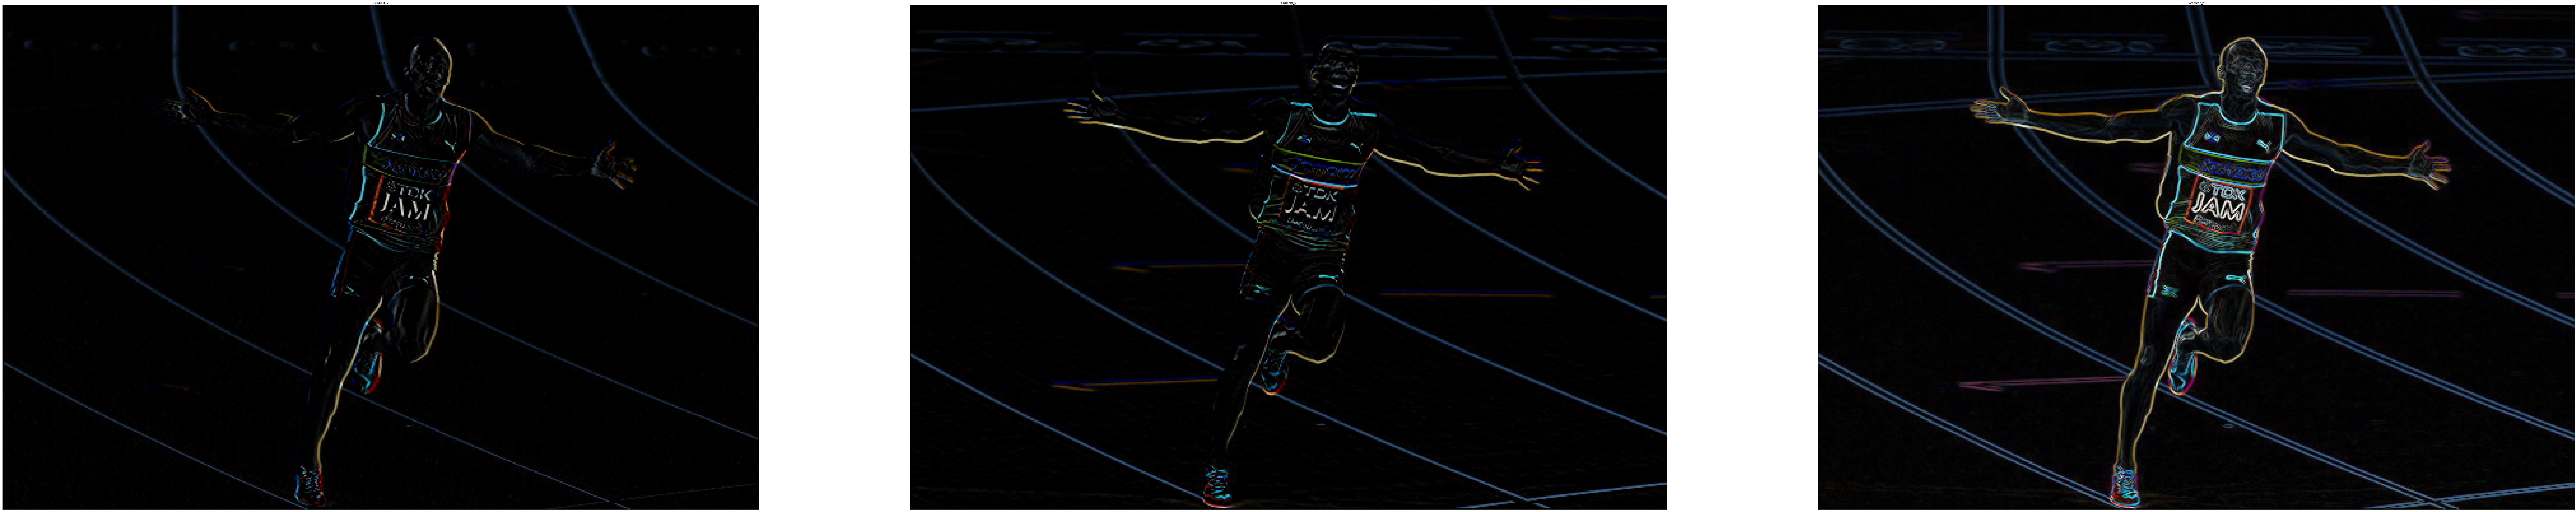

In [27]:
# Python gradient calculation
# Read image
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('images/bolt.jpg')
# print(img)
img = np.float32(img) / 255.0
# Calculate gradient
gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

plt.figure(figsize=(200,100))
plt.subplot(131),plt.imshow(gx,cmap = 'gray')
plt.title('Gradient_x'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gy,cmap = 'gray')
plt.title('Gradient_y'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(mag,cmap = 'gray')
plt.title('Gradient_y'), plt.xticks([]), plt.yticks([])
plt.show()

Bước 3: Tính toán biểu đồ của các lớp trong các ô 8 × 8
    
Trong bước này, hình ảnh được chia thành các ô 8 × 8 và biểu đồ độ dốc được tính cho mỗi ô 8 × 8.

![](https://www.learnopencv.com/wp-content/uploads/2016/11/hog-cells.png)

Tại sao lại là 8 x 8. 8x8 là kích thước chúng ta đủ quan sát từng chi tiết nhỏ trên đối tượng, ngoài ra với mỗi pixel có 2 giá trị là cường độ và hướng đạo hàm thì có 8x8x2=128 (128 số này được biểu diễn bằng biểu đồ 9 ngăn có thể được lưu trữ dưới dạng một mảng gồm 9 số)đặc trưng cho một khối 8x8 con số này khá đẹp và trong các mô hình học máy hay deeplearning các con số mà là bội số của 4 đều là con số yêu thích. Có thể nghe hơi vô lí nhưng nó có gì đó ma mị với con số là bội của 4 như 4 8 16 32 64 128 256 1024....

Chúng ta thấy các số nguyên biểu thị độ dốc trong các ô 8 × 8 với một sự khác biệt nhỏ - các góc nằm trong khoảng từ 0 đến 180 độ thay vì 0 đến 360 độ. Chúng được gọi là các gradient gradient không dấu bởi vì một gradient và âm của nó được biểu thị bằng cùng một số. Nói cách khác, một mũi tên gradient và 180 độ đối diện với nó được coi là giống nhau. Nhưng, tại sao không sử dụng 0 - 360 độ? Theo kinh nghiệm, người ta đã chứng minh rằng độ dốc không dấu hoạt động tốt hơn độ dốc đã ký để phát hiện người đi bộ. Một số triển khai của HOG sẽ cho phép bạn chỉ định nếu bạn muốn sử dụng độ dốc đã ký.

![](https://www.learnopencv.com/wp-content/uploads/2016/12/hog-cell-gradients-768x432.png)


![](https://www.learnopencv.com/wp-content/uploads/2016/12/hog-histogram-1.png)

Trước tiên hãy tập trung vào pixel được bao quanh trong màu xanh. Nó có một góc (hướng) 80 độ và cường độ là 2. Vì vậy, nó thêm 2 vào thùng thứ 5. Độ dốc tại pixel được bao quanh bằng màu đỏ có góc 10 độ và cường độ 4. Vì 10 độ là một nửa trong khoảng từ 0 đến 20, phiếu bầu của pixel sẽ chia đều cho hai thùng.

![](https://www.learnopencv.com/wp-content/uploads/2016/12/hog-histogram-2.png)

Có một chi tiết cần lưu ý. Nếu góc lớn hơn 160 độ, nó nằm trong khoảng từ 160 đến 180 và chúng ta biết góc bao quanh tạo thành 0 và 180 tương đương. Vì vậy, trong ví dụ dưới đây, pixel có góc 165 độ đóng góp tỷ lệ thuận với thùng 0 độ và thùng 160 độ.

![](https://www.learnopencv.com/wp-content/uploads/2016/12/histogram-8x8-cell.png)

Bạn có thể thấy biểu đồ có rất nhiều trọng lượng gần 0 và 180 độ, đó chỉ là một cách khác để nói rằng trong các gradient vá đang chỉ lên hoặc xuống.

Bước 4: Chuẩn hóa khối 16 × 16

![](https://www.learnopencv.com/wp-content/uploads/2016/12/hog-16x16-block-normalization.gif)

Thao tác cụ thể chuẩn hóa cho mỗi block chúng ta sẽ dùng L2-Norm. Cách làm là mình lấy tất cả vector của 4 cell trong block đang xét nối lại với nhau thành vector v. Vector v có 9 x 4 = 36 phần tử. Sau đó ta chuẩn hóa (tính toán lại vector v) theo công thức bên bên dưới:

![](https://firebasestorage.googleapis.com/v0/b/minh-nguyen-blog.appspot.com/o/post-images%2Fopencv%2Fl2-norm.png?alt=media&token=1da08abb-c797-4ba4-a239-e17febbd6d7a)


Bước 5: Đưa ra đặc trưng cho vector

Làm phẳng tất cả các giá trị trên. 

3. Image hashing

![](https://www.pyimagesearch.com/wp-content/uploads/2017/11/image_hashing_blueprint-768x229.png)

Chúng ta nghe băm khá nhiều trong kiến thức liên quan đến bảo mật, các thuật toán mã hóa mật khẩu SHA, MD5 nhưng trong hình ảnh băm hình ảnh đảm bảo các yếu tố:

+ Kiếm tra nội dung hình ảnh.
+ Xây dựng một giá trị băm xác định duy nhất một hình ảnh đầu vào dựa trên nội dung của một hình ảnh. 


Tại sao không thể sử dụng hàm bằm trong mật khẩu như SHA, MD5 các thuật toán này cực kì nhạy cảm với thay đổi đôi khi sự thay đổi trên 1 pixel có thể khiến kết quả băm ra là khác nhau. Chẳng hạn một hình ảnh có kích thước 500px sau đó được tôi giảm size nó xuống còn 250px bản chất nội dung bên trong nó là không thay đổi, nhưng áp dụng thuật toán băm trên cho hai kết quả khác nhau.

Chính lẻ đó băm cho hình ảnh là quá trình băm tri thức thuật toán đây sử dụng là dHash.

Các thao tác để băm 1 hình ảnh:

1. Chuyển ảnh đó về ảnh xám

Mục đích điều này là để giảm khối lượng tính toán, chúng ta đang quan tâm đến nội dung bên trong bức ảnh nên việc đưa ảnh xác cũng giúp chúng ta hiểu hơn về 